In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\ankur\Downloads\predictive_maintenance.csv")

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


since we have find that we dont need product id and udi so we gonna drop this columns

In [5]:
df.drop(columns=["UDI","Product ID"],inplace=True)

In [6]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


we have seen that there are three columns which are object type so we will handle those columns carefully before that we will check the null values 

## Null Value Handling

In [7]:
df.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

Since we have find that there is no null values so now we will handle object type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [9]:
df["Type"].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [10]:
df.replace({"L":0,"M":1,"H":2},inplace=True)

In [11]:
df["Type"].value_counts()

Type
0    6000
1    2997
2    1003
Name: count, dtype: int64

In [12]:
df["Failure Type"].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder


In [14]:
le = LabelEncoder()


In [15]:
df["Failure Type"] = le.fit_transform(df["Failure Type"])

In [16]:
df["Failure Type"].value_counts()

Failure Type
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64

## Outlairs Handling

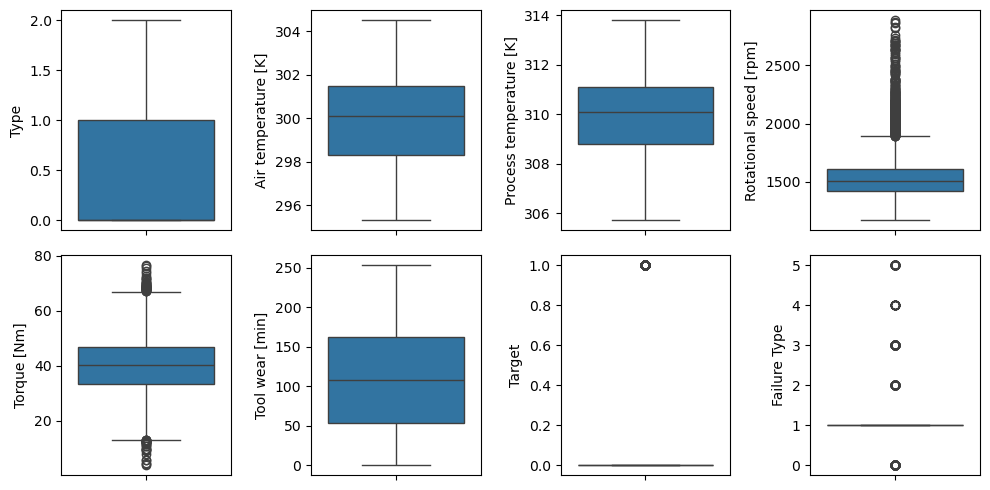

In [17]:
plt.figure(figsize=(10,5))
for i,col in enumerate(df.columns):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=col,data=df)
    plt.tight_layout()
plt.show()
    

In [18]:
outcol = ["Rotational speed [rpm]","Torque [Nm]"]
for i in outcol:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    min_val = q1 - 1.5*IQR
    max_val = q3 + 1.5*IQR
    df = df[(df[i] >= min_val) & (df[i] <= max_val)]

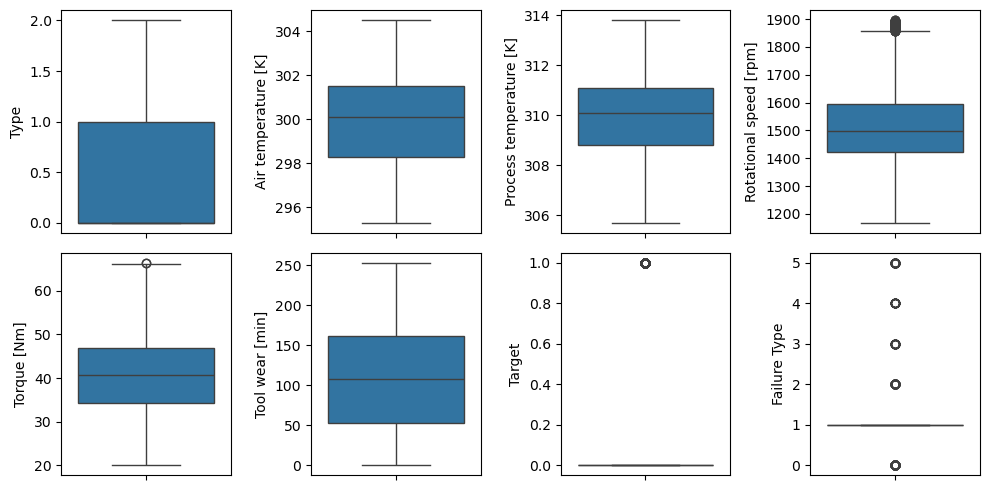

In [19]:
plt.figure(figsize=(10,5))
for i,col in enumerate(df.columns):
    plt.subplot(2,4,i+1)
    sns.boxplot(y=col,data=df)
    plt.tight_layout()
plt.show()

this dataset has two outputs one is target and other one is failure type that's why we have to use multioutput classifier

In [20]:
x = df.drop(columns=["Target","Failure Type"])
y = df[["Target","Failure Type"]]

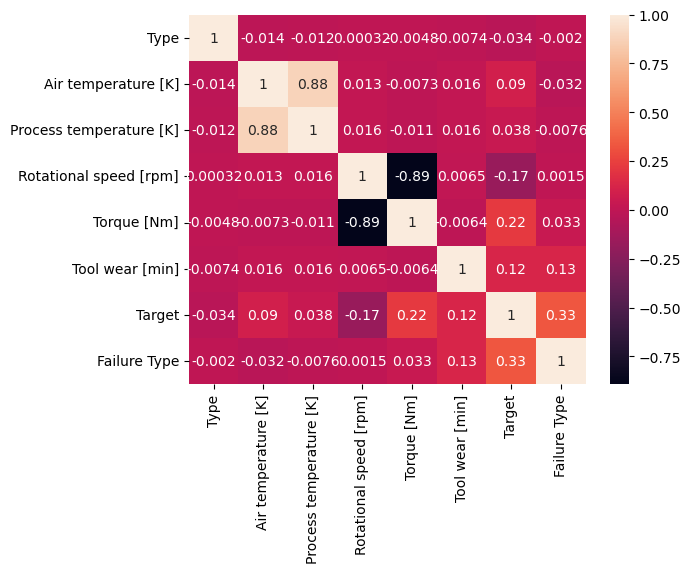

In [21]:
sns.heatmap(df.corr(),annot=True)
plt.show()

As we can see that there is not much correlation in the target variable and failure type so we will use the algorithm accordingly

In [22]:
x.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,298.1,308.6,1551,42.8,0
1,0,298.2,308.7,1408,46.3,3
2,0,298.1,308.5,1498,49.4,5
3,0,298.2,308.6,1433,39.5,7
4,0,298.2,308.7,1408,40.0,9


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

In [26]:
rf=RandomForestClassifier()

In [27]:
multi_output_rf = MultiOutputClassifier(rf, n_jobs=-1)

In [28]:
multi_output_rf.fit(x_train,y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(), n_jobs=-1)

In [29]:
multi_output_rf.score(x_train,y_train),multi_output_rf.score(x_test,y_test)

(1.0, 0.9753539590980598)

Now we have to extract raw file using joblib for depolying it in streamit.

In [30]:
import joblib
joblib.dump(multi_output_rf, "multi_output_rf_model.pkl")
print("Model saved as multi_output_rf_model.pkl")

Model saved as multi_output_rf_model.pkl


We can't plot confusion matrix for dataset having multiple outputs
